In [2]:
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import pandas

In [59]:
train_x = np.linspace(1.0, 10.0, num = 100)[:, np.newaxis]
train_y = np.sin(train_x) + 0.1* np.power(train_x, 2) + 0.5 + np.random.randn(100, 1)

with np.load("TINY_MNIST.npz") as data:
    x, t = data["x"], data["t"]
    x_eval, t_eval = data["x_eval"], data["t_eval"]

### k - nearest neighbours
In this section, we will learn to implement the k-Nearest Neighbor (k-NN) algorithm on the Tiny MNIST dataset. We will also see the effect of the value of k as well as the training size for k-NN.

### Task 1 Training Size

Set k = 1 and submit a 2-column table that lists the number of validation errors that you get versus the training size when the training size N is N ∈ {5, 50, 100, 200, 400, 800} (Use the first N points in the complete training dataset). In one sentence, summarize your observation about the effect of N on performance and whether you think large N or small N is best.

In [6]:
# Define functions to get Euclidean distance

def getEucDist(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)

def getEucDistAll(vecToClass, vecs, resp):
    arr = [] 
    for idx, val in enumerate(vecs):
        arr.append([getEucDist(val, vecToClass), resp[idx][0]])
    arr.sort(key=lambda x: x[0])
    ed = np.asarray(arr)
    return ed

def getVote(sortedResp, K):
    p1 = np.count_nonzero(sortedResp[0:K])/K
    return p1

### Task 2 Overfitting and Underfitting
Submit a 2-column table that lists the number of validation errors that you get versus the values of k ∈ {1, 3, 5, 7, 21, 101, 401}. For this task, use the complete training set of N = 800. In one sentence, summarize your observation about the effect of k on performance and what the best value of k is.

In [60]:
Nnei = [5, 50, 100, 200, 400, 800]
kval = [1, 3, 5, 7, 21, 101, 401]

In [63]:
def getResid(n, k, x_val, tr, resp):
    arr_comp = []
    for idx, im in enumerate(x_val):
        ed_iter = getEucDistAll(im, tr[0:n], resp[0:n])
        arr_comp.append([resp[idx][0] , getVote(ed_iter[:,1], k ) > 0.49 ])
    return arr_comp

In [61]:
def getPrecRecall(n, k, x_val, tr, resp):
    res = getResid(n, k, x_val, tr, resp)
    df = pandas.DataFrame(res)
    df.columns = ['resp', 'forec']
    
    tps = len(df.ix[(df['resp']== 1) & (df['forec'] == 1) ])
    fps = len(df.ix[(df['resp']== 0) & (df['forec'] == 1) ])
    tns = len(df.ix[(df['resp']== 0) & (df['forec'] == 0) ])
    fns = len(df.ix[(df['resp']== 1) & (df['forec'] == 0) ])
    
    prec = tps/(tps + fps)
    reca = tps/(tps + fns)
    f1 = 2*(prec*reca)/(prec + reca)
    
    arr_ret = pandas.DataFrame.transpose(pandas.DataFrame([n, k, fps + fps , prec, reca, f1 ]))
    arr_ret.columns = ['n', 'k', 'val_err', 'prec', 'reca', 'f1']
    return arr_ret

We calculate the number of validation errors (val_err), but in addition we also examine the precision, recall and f1 scores of the algorithm. We see that the number of validation errors diminish as we increase n, but the precision to recall ratio remains the same. We should use the entire training set for training.

In [64]:
df_task1 = getPrecRecall(5, 1, x_eval, x, t).append(getPrecRecall(50, 1, x_eval, x, t)).append(getPrecRecall(100, 1, x_eval, x, t)).append(getPrecRecall(200, 1, x_eval, x, t)).append(getPrecRecall(400, 1, x_eval, x, t)).append(getPrecRecall(800, 1, x_eval, x, t))
df_task1

,n,k,val_err,prec,reca,f1
0,5,1,250,0.481328,0.580,0.526077
0,50,1,206,0.474490,0.465,0.469697
0,100,1,210,0.477612,0.480,0.478803
0,200,1,212,0.477833,0.485,0.481390
0,400,1,208,0.477387,0.475,0.476190
0,800,1,200,0.479167,0.460,0.469388


(190, 260)

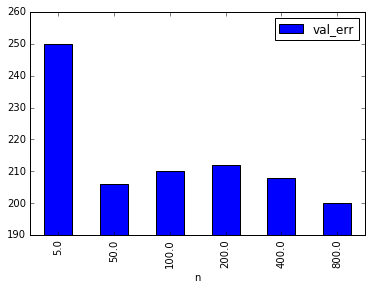

In [81]:
tt = df_task1.plot(kind='bar', x = 'n', y = 'val_err')
tt.set_ylim(190,260)

Varying the number of neighbours k, we calculate the number of validation errors (val_err), but in addition we also examine the precision, recall and f1 scores of the algorithm. We see that the number of validation errors diminish as we increase k, but the precision to recall ratio remains the same. Thus we should use a lower number of k = 1 for efficiency.

In [65]:
df_task2 = getPrecRecall(800, 1, x_eval, x, t).append(getPrecRecall(800, 3, x_eval, x, t)).append(getPrecRecall(800, 5, x_eval, x, t)).append(getPrecRecall(800, 7, x_eval, x, t)).append(getPrecRecall(800, 21, x_eval, x, t)).append(getPrecRecall(800, 101, x_eval, x, t)).append(getPrecRecall(800, 401, x_eval, x, t))
df_task2

,n,k,val_err,prec,reca,f1
0,800,1,200,0.479167,0.460,0.469388
0,800,3,208,0.480000,0.480,0.480000
0,800,5,210,0.475000,0.475,0.475000
0,800,7,208,0.477387,0.475,0.476190
0,800,21,210,0.477612,0.480,0.478803
0,800,101,210,0.467005,0.460,0.463476
0,800,401,196,0.494845,0.480,0.487310


(190, 220)

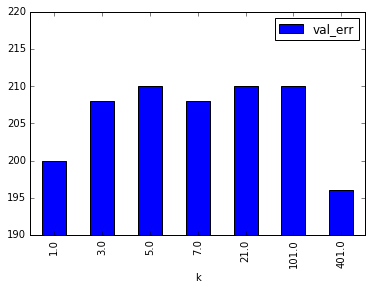

In [76]:
pp = df_task2.plot(kind='bar', x = 'k', y = 'val_err')
pp.set_ylim(190,220)

### Task 3 Linear Fit 
Use the linear regression algorithm to fit a line to the artificial dataset. Plot both the training data and the fitted line.

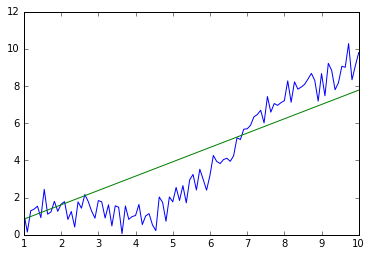

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from gradient_descent import gradient_descent


train_x = np.linspace (1.0 , 10.0 , num =100) [:, np.newaxis]
train_y = np.sin( train_x ) + np.power ( train_x , 2) * 0.1 + np.random .randn (100 , 1) * 0.5
yd = np.shape(train_y)
T = yd[0]
eta = 0.001
plt.plot(train_x, train_y)
w = gradient_descent(train_x, train_y, eta)
train_y_p = np.zeros(T, dtype = float)
for i in range(0, T):
    train_y_p[i] = w[0] + w[1] * train_x[i]
plt.plot(train_x, train_y_p)
plt.show()


We see that our linear regresion produces an acceptable fit on the training data.

### Task 4 Feature Space
We can fit a better function to the data points by introducing non-linearity in our model. One way to do so is to map each input x to a high dimensional feature space of [1, x, x2, x3, x4, x5]
2
￼￼￼￼￼￼￼
and then train a linear regression on top of the feature space. Note that in this case, you might have to normalize each dimension of the feature space before training your model. Use the above feature space and plot both the training data and the fitted curve. In one sentence, summarize your observation about the effect of non-linearity on performance.

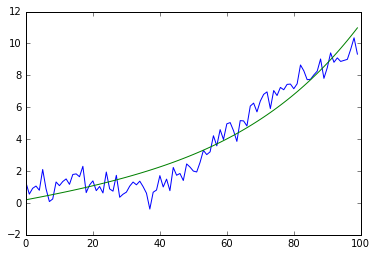

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from gradient_descent import gradient_descent


train_x_1 = np.linspace (1.0 , 10.0 , num =100) [:, np. newaxis]
train_x_2 = [x**2 for x in train_x_1]
train_x_3 = [x**3 for x in train_x_1]
train_x_4 = [x**4 for x in train_x_1]
train_x_5 = [x**5 for x in train_x_1]

train_mean = np.zeros(5)
train_mean[0] = np.mean(train_x_1)
train_mean[1] = np.mean(train_x_2)
train_mean[2] = np.mean(train_x_3)
train_mean[3] = np.mean(train_x_4)
train_mean[4] = np.mean(train_x_5)

train_std = np.zeros(5)
train_std[0] = np.std(train_x_1)
train_std[1] = np.std(train_x_2)
train_std[2] = np.std(train_x_3)
train_std[3] = np.std(train_x_4)
train_std[4] = np.std(train_x_5)

train_x_1_n = [(x-train_mean[0])/train_std[0] for x in train_x_1]
train_x_2_n = [(x-train_mean[1])/train_std[1] for x in train_x_2]
train_x_3_n = [(x-train_mean[2])/train_std[2] for x in train_x_3]
train_x_4_n = [(x-train_mean[3])/train_std[3] for x in train_x_4]
train_x_5_n = [(x-train_mean[4])/train_std[4] for x in train_x_5]

train_x = np.zeros((100,5))

train_x[:, 0] = train_x_1_n
train_x[:, 1] = train_x_2_n
train_x[:, 2] = train_x_3_n
train_x[:, 3] = train_x_4_n
train_x[:, 4] = train_x_5_n

train_y = np.sin( train_x_1 ) + np.power ( train_x_1 , 2) * 0.1 + np.random .randn (100 , 1) * 0.5
eta = 0.001
plt.plot(range(0,len(train_y)), train_y)

eta =  0.05
w = gradient_descent(train_x, train_y, eta)
train_y_p = np.zeros(100)

for i in range(0, 100):
    train_y_p[i] = w[0]
    for j in range(1, 6):
        train_y_p[i] = train_y_p[i] + w[j] * ((train_x_1[i] ** j - train_mean[j-1])/train_std[j-1])

plt.plot(range(0,len(train_y)), train_y_p)
plt.show()

We see that the normalized high dimensional space regressions prodoces a more accurate fit on the training data.

### Task 5 Training Size

In [49]:
import numpy as np

def gradient_descent(x, y, eta):
    xd = np.shape(x)
    yd = np.shape(y)
    N = xd[1]
    T = yd[0]
    w = np.random.rand(N+1)
    y_hat = np.zeros(T, dtype=float)
    NUM_IT = 100
    for l in range(0, NUM_IT):
        for k in range(0, T):
            y_hat[k] = w[0]
            for i in range(1, N + 1):
                y_hat[k] = y_hat[k] + w[i] * x[k, i-1]
        delta = np.zeros(N+1, dtype=float)
        for k in range(0, T):            
            delta[0] = delta[0] + (2 * (y[k,0] - y_hat[k]))/T             
        for i in range(1, N+1):
            for k in range(0, T):           
                delta[i] = delta[i] + (2 * (y[k,0] - y_hat[k])*x[k, i-1])/T
        for i in range(0, N + 1):
            w[i] = w[i] + eta * delta[i]
    return w          

In [22]:
N = [100, 200, 400, 800]

In [25]:
def getLinForecast(linParam, x):
    # First element is the intercept
    inter = linParam[0]
    return inter + np.dot(linParam[1:len(linParam)], x)
    
def getValErr(x_eval, N, mod):
    val_error = []
    for idx, val in enumerate(x_eval[1:N]):
        resid = getLinForecast(mod, x_eval[idx]) - t_eval[idx]
        val_error.append( (resid[0])**2 )

    return sum(val_error)/(2*len(val_error))

In [41]:
gg = gradient_descent(x[1:100], t[1:100], 0.1, 2000 )


In [35]:
getValErr(x_eval, len(x_eval), gg) 

51.016798967766988

In [50]:
valErrs = []
eta = 0.1
iter_max = 2000

for n in N:
    gg = gradient_descent(x[1:n], t[1:n], eta)
    vl = getValErr(x_eval, len(x_eval), gg)
    valErrs.append([n, vl])

In [51]:
df_vl = pandas.DataFrame(valErrs)
df_vl.columns = ['n', 'Validation Error']
df_vl

,n,Validation Error
0,100,0.110093
1,200,0.089638
2,400,0.078058
3,800,0.093623


#### Task 6

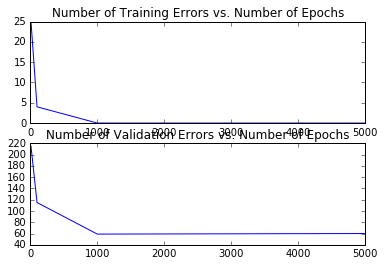

In [52]:
import matplotlib.pyplot as plt
from reg_gradient_descent import reg_gradient_descent

with np.load ("TINY_MNIST.npz") as data :
    x, t = data ["x"], data["t"]
    x_eval , t_eval = data ["x_eval"], data ["t_eval"] 
train_x = x[0:50,:]
train_t = t[0:50]
train_x_shape = np.shape(train_x)
x_eval_shape = np.shape(x_eval)
T = x_eval_shape[0]
N = train_x_shape[1]
M = train_x_shape[0]
eta = 0.1
NUM_IT = [1, 10, 100, 1000, 5000] 
shape_NUM_IT = np.shape(NUM_IT)
L = shape_NUM_IT[0] 
error = np.zeros((L, 3))
for i in range(0, L):
    w = reg_gradient_descent(train_x, train_t, eta, 0, NUM_IT[i])
    error[i, 0] = NUM_IT[i]
    for j in range(0, M):   
        t_predicted_train = np.dot(w[1:N+1], np.transpose(train_x[j, :])) + w[0]  
        if t_predicted_train <= 0.5:
            t_predicted_train = 0
        else:
            t_predicted_train = 1   
        if t_predicted_train != train_t[j]:
            error[i, 1] = error[i, 1] + 1 
    for j in range(0, T):   
        t_predicted_eval = np.dot(w[1:N+1], np.transpose(x_eval[j, :])) + w[0]  
        if t_predicted_eval <= 0.5:
            t_predicted_eval = 0
        else:
            t_predicted_eval = 1   
        if t_predicted_eval != t_eval[j]:
            error[i, 2] = error[i, 2] + 1              


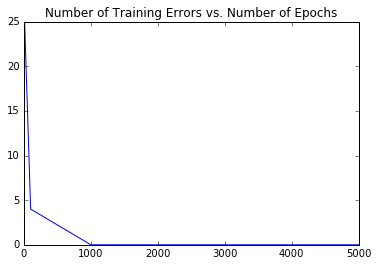

In [53]:
plt.plot(error[:, 0], error[:, 1])
plt.title('Number of Training Errors vs. Number of Epochs')
plt.show()

<function matplotlib.pyplot.show>

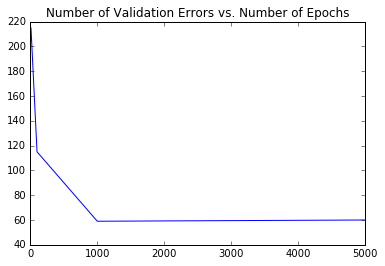

In [54]:
plt.plot(error[:, 0], error[:, 2])
plt.title('Number of Validation Errors vs. Number of Epochs')
plt.show

In [55]:
import matplotlib.pyplot as plt
from reg_gradient_descent import reg_gradient_descent

with np.load ("TINY_MNIST.npz") as data :
    x, t = data ["x"], data["t"]
    x_eval , t_eval = data ["x_eval"], data ["t_eval"] 
train_x = x[0:50,:]
train_t = t[0:50]
lamda = [0, 0.0001, 0.001, 0.01, 0.1, 0.5]
lamda_shape = np.shape(lamda)
train_x_shape = np.shape(train_x)
x_eval_shape = np.shape(x_eval)
T = x_eval_shape[0]
L = lamda_shape[0]
N = train_x_shape[1]
eta = 0.1
error = np.zeros((L, 2))
NUM_IT = 5000 
for i in range(0, L): 
    w = reg_gradient_descent(train_x, train_t, eta, lamda[i], NUM_IT)
    error[i, 0] = lamda[i]
    for j in range(0, T):   
        t_predicted = np.dot(w[1:N+1], np.transpose(x_eval[j, :])) + w[0]  
        if t_predicted <= 0.5:
            t_predicted = 0
        else:
            t_predicted = 1   
        if t_predicted != t_eval[j]:
            error[i, 1] = error[i, 1] + 1              
# for i in range(0, L):
    # print("%f\t%d" % (error[i, 0], error[i, 1]))

0.000000	71
0.000100	73
0.001000	60
0.010000	39
0.100000	47
0.500000	79


In [57]:
df_err = pandas.DataFrame(error)
df_err.columns = ['n', 'Validation Error']
df_err

,n,Validation Error
0,0.0000,71
1,0.0001,73
2,0.0010,60
3,0.0100,39
4,0.1000,47
5,0.5000,79
